In [ ]:
# !pip install -y graphviz  ##시각화를 위한 모듈
# !conda install -y graphviz

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import graphviz
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [3]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_boston, load_diabetes
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

## 분류를 위한 데이터

### 붓꽃 데이터

In [5]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target
# iris_df

### 와인 데이터

In [4]:
wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns = wine.feature_names)
wine_df['target'] = wine.target
# wine_df

### 유방암 데이터

In [ ]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
# cancer_df

## Regression 데이터

### 보스턴 주택 가격 데이터

In [ ]:
boston = load_boston()

In [ ]:
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['target'] = boston.target
# boston_df

### 당뇨병 데이터

In [ ]:
diabetes = load_diabetes()

In [ ]:
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
# diabetes_df

## 분류 - `DecisionTreeClassifier()`

- `DecisionTreeClassifier`는 분류를 위한 결정트리 모델
- 두개의 배열 x, y를 입력 받음
  - x는 [n_samples, n_features] 크기의 데이터 특성 배열
  - y는 [n_samples] 크기의 정답 배열

In [ ]:
x = [[0, 0], [1, 1]]  
y = [0, 1]

model = tree.DecisionTreeClassifier()
model.fit(x, y)

DecisionTreeClassifier()

In [ ]:
model.predict([[2., 2.]])

array([1])

In [ ]:
model.predict_proba([[2., 2.]]) #0으로 분류할 확률 0% 1로 분류할 확률 100%

array([[0., 1.]])

In [ ]:
r = tree.export_text(decision_tree=model,
                     feature_names=["X_1", "X_2"])
print(r) #규칙에 대해 내보낼 수 있음

|--- X_2 <= 0.50
|   |--- class: 0
|--- X_2 >  0.50
|   |--- class: 1



[Text(0.5, 0.75, 'X[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

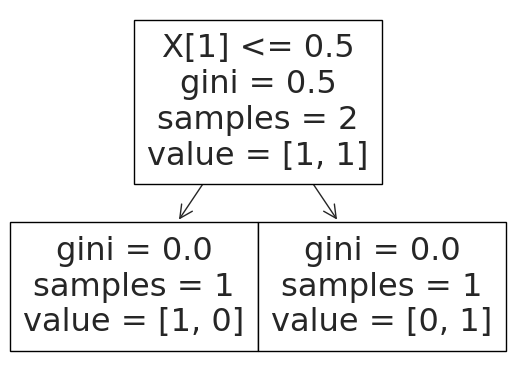

In [ ]:
tree.plot_tree(model)

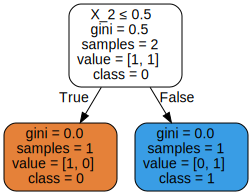

In [ ]:
dot_data = tree.export_graphviz(decision_tree=model,
                                feature_names = ["X_1", "X_2"],
                                class_names = ["0", "1"],
                                filled = True, rounded = True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

### 붓꽃 데이터 학습

#### 교차검증

#### StandardScaler를 용해 전처리 여부에 영향을 받는지 확인해 보자

##### 전처리 없이 학습

In [ ]:
model = tree.DecisionTreeClassifier()

In [ ]:
cross_val_score(estimator=model,
                cv=5,
                X=iris.data, y=iris.target,
                n_jobs=multiprocessing.cpu_count()
                )

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])

##### 전처리 후 학습
* 결정 트리는 규칙을 학습하기 때문에 전처리에 큰 영향을 받지 않는다.

In [ ]:
model = make_pipeline(
    StandardScaler(),
    tree.DecisionTreeClassifier()
)

In [ ]:
cross_val_score(estimator=model,
                cv=5,
                X=iris.data, y=iris.target,
                n_jobs=multiprocessing.cpu_count()
                )

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

#### 학습된 결정 트리 시각화

In [ ]:
model = tree.DecisionTreeClassifier()
model.fit(iris.data, iris.target)

DecisionTreeClassifier()

##### 텍스트를 통한 시각화

In [ ]:
r = tree.export_text(decision_tree=model,
                     feature_names=iris.feature_names)
print(r)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



##### plot_tree를 사용한 시각화

[Text(0.5, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

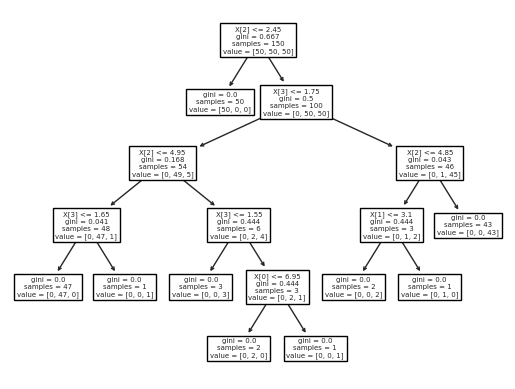

In [ ]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

In [ ]:
# https://graphviz.readthedocs.io/en/stable/examples.html

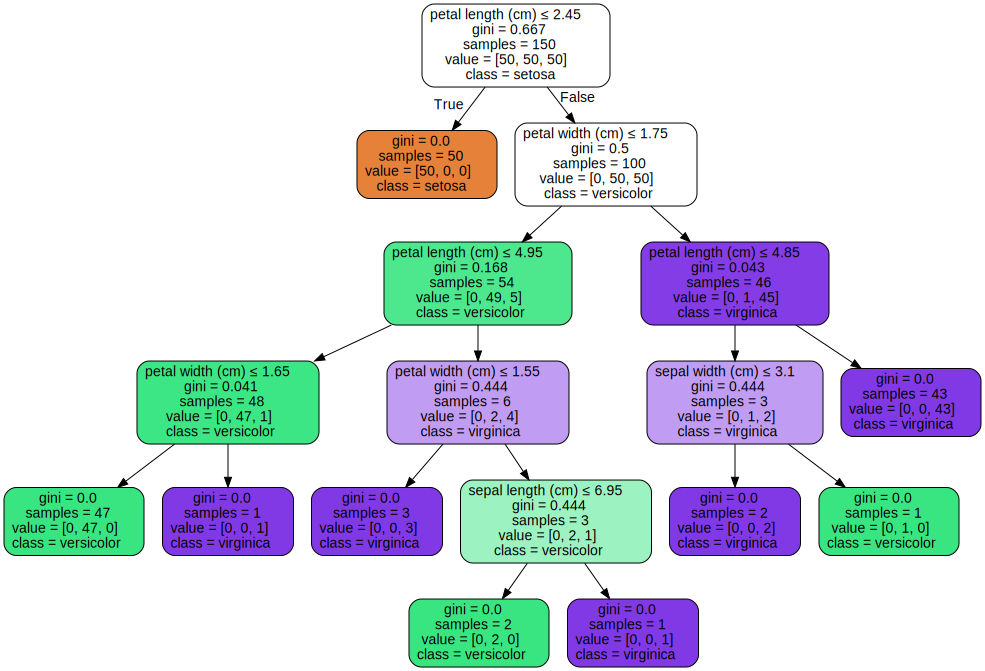

In [ ]:
dot_data = tree.export_graphviz(decision_tree=model,
                                feature_names = iris.feature_names,
                                class_names = iris.target_names,
                                filled = True, rounded = True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### 시각화

In [ ]:
n_classes = 3
plot_colors = 'ryb'
plot_step=.02

##### 결정 경계 시각화

(0.0, 7.88, -0.9, 3.4800000000000044)

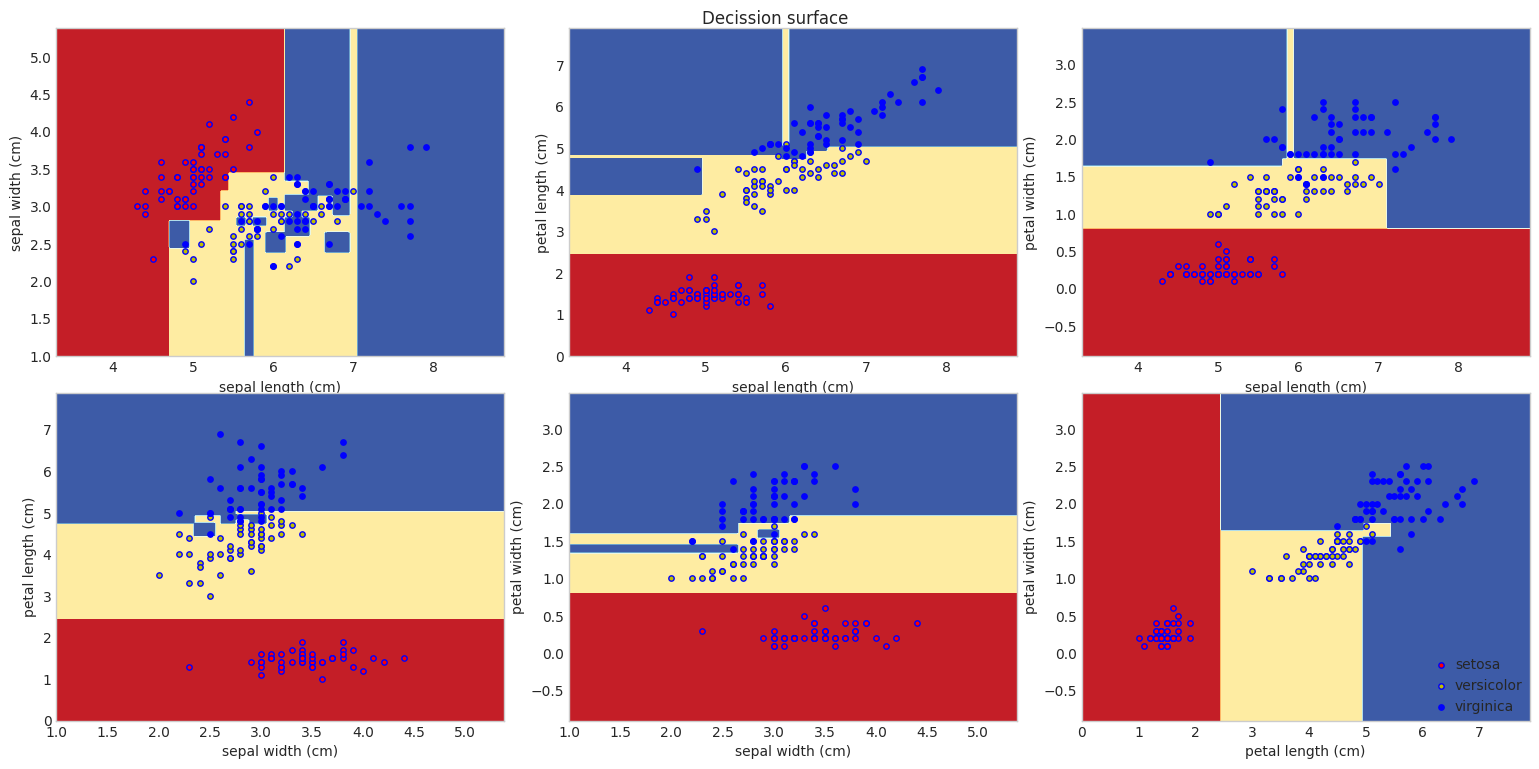

In [ ]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                               [1, 2], [1, 3], [2, 3]]):
  x = iris.data[:, pair]
  y = iris.target

  model = tree.DecisionTreeClassifier()
  model = model.fit(x, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = x[:, 0].min()-1, x[:, 0].max()+1
  y_min, y_max = x[:, 1].min()-1, x[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=-.5, w_pad=.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(iris.feature_names[pair[0]])
  plt.ylabel(iris.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y==i)
    plt.scatter(x[idx, 0], x[idx, 1], c=color, label = iris.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decission surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

##### max_depth 변화에 따른 결정 경계의 변화 확인

(0.0, 7.88, -0.9, 3.4800000000000044)

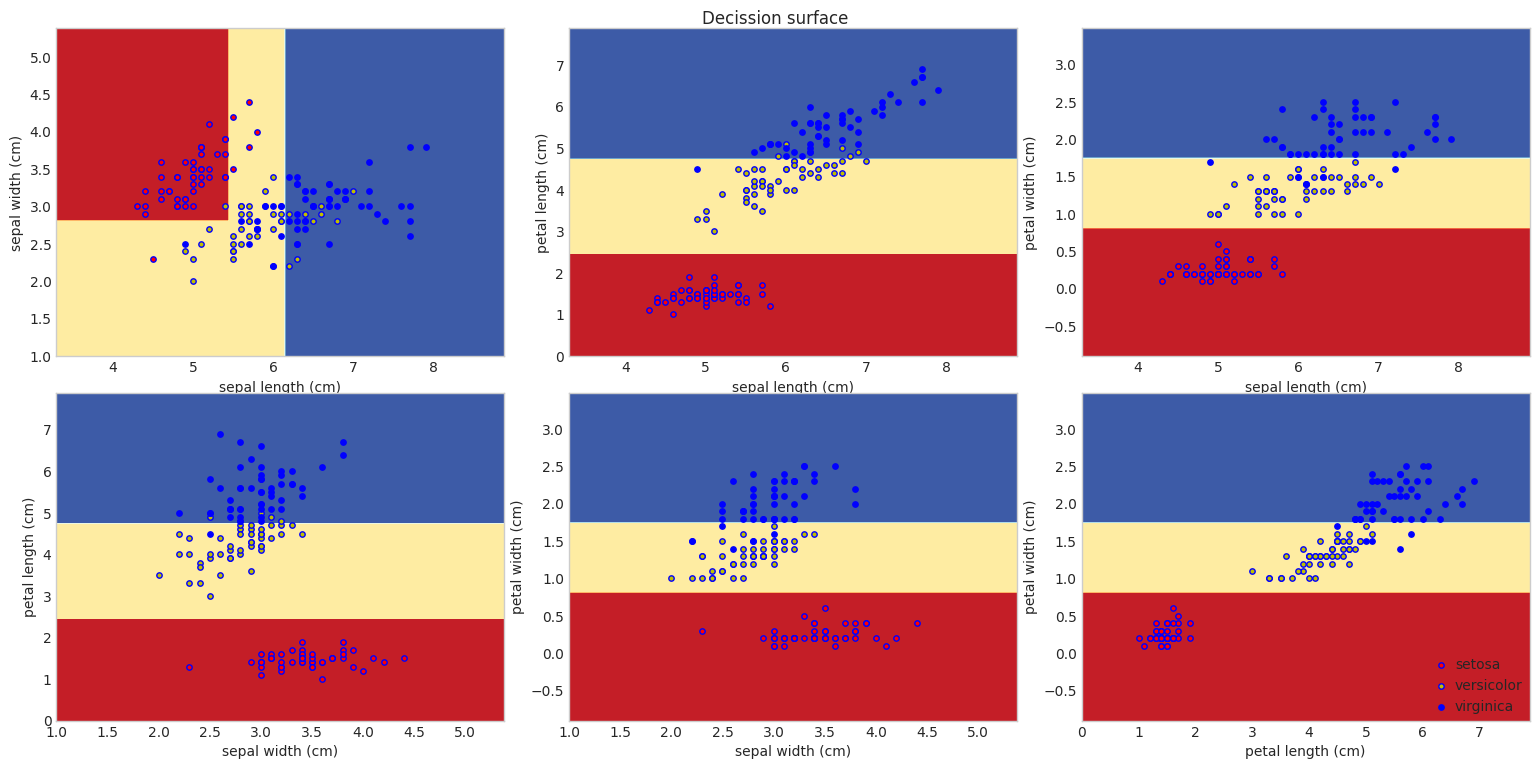

In [ ]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                               [1, 2], [1, 3], [2, 3]]):
  x = iris.data[:, pair]
  y = iris.target

  model = tree.DecisionTreeClassifier(max_depth=2)
  model = model.fit(x, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = x[:, 0].min()-1, x[:, 0].max()+1
  y_min, y_max = x[:, 1].min()-1, x[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=-.5, w_pad=.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(iris.feature_names[pair[0]])
  plt.ylabel(iris.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y==i)
    plt.scatter(x[idx, 0], x[idx, 1], c=color, label = iris.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decission surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

### 와인 데이터 학습

#### 교차 검증

In [6]:
wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns = wine.feature_names)
wine_df['target'] = wine.target
# wine_df

##### 전처리 없이 학습

In [15]:
model=tree.DecisionTreeClassifier()

In [16]:
score=cross_val_score(estimator=model,
                cv=5, 
                X=wine.data, y=wine.target) #단순교차검증, cv=fold 개수, 각 분할마다 정확도(accuracy)를 측정.
                #accuracy= (TP+TN)/TP+TN+FP+FN
                #각 분할마다 하나의 폴드를 테스트용으로 사용하고 나머지 4개의 폴드는 훈련용으로 사용

In [17]:
score.mean()

0.8652380952380951

##### 전처리 후 학습

In [18]:
model=make_pipeline(StandardScaler(),
                    tree.DecisionTreeClassifier())

In [19]:
score= cross_val_score(estimator=model,
                      cv=5, 
                      X=wine.data, y=wine.target,
                      n_jobs=multiprocessing.cpu_count()) #n_jobs= 사용된 cpu 개수. 

In [20]:
score.mean()

0.8707936507936507

최적화모델 (그리드서치)

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid =[{"criterion":['gini', 'entropy'],
              "min_samples_leaf":[1, 2, 3, 4, 5, 6, 7, 8, 9],
              "max_depth":[2, 3, 4, 5, 6, None],
              "min_samples_split":[2, 3, 4, 5, 6, 7, 8, 9, 10],
}]

In [39]:
gs = GridSearchCV(
    estimator = tree.DecisionTreeClassifier(),
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose = True 
)

In [40]:
gs.fit(wine.data, wine.target)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=2,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 3, 4, 5, 6, None],
                          'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}],
             verbose=True)

In [ ]:
gs.best_params_

In [ ]:
gs.best_score_

#### 학습된 결정 트리 시각화

In [22]:
model = tree.DecisionTreeClassifier()
model.fit(wine.data,wine.target)

DecisionTreeClassifier()

##### 텍스트를 통한 시각화

In [25]:
r= tree.export_text(decision_tree=model,
                    feature_names=wine.feature_names)
print(r)

|--- proline <= 755.00
|   |--- od280/od315_of_diluted_wines <= 2.11
|   |   |--- hue <= 0.94
|   |   |   |--- flavanoids <= 1.58
|   |   |   |   |--- class: 2
|   |   |   |--- flavanoids >  1.58
|   |   |   |   |--- class: 1
|   |   |--- hue >  0.94
|   |   |   |--- malic_acid <= 2.39
|   |   |   |   |--- class: 1
|   |   |   |--- malic_acid >  2.39
|   |   |   |   |--- class: 2
|   |--- od280/od315_of_diluted_wines >  2.11
|   |   |--- flavanoids <= 0.80
|   |   |   |--- class: 2
|   |   |--- flavanoids >  0.80
|   |   |   |--- alcohol <= 13.17
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  13.17
|   |   |   |   |--- malic_acid <= 2.12
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- malic_acid >  2.12
|   |   |   |   |   |--- class: 0
|--- proline >  755.00
|   |--- flavanoids <= 2.17
|   |   |--- color_intensity <= 3.61
|   |   |   |--- class: 1
|   |   |--- color_intensity >  3.61
|   |   |   |--- class: 2
|   |--- flavanoids >  2.17
|   |   |--- magnesium <= 135.

##### plot_tree를 사용한 시각화

[Text(0.5657894736842105, 0.9166666666666666, 'X[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(0.34210526315789475, 0.75, 'X[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(0.21052631578947367, 0.5833333333333334, 'X[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(0.10526315789473684, 0.4166666666666667, 'X[6] <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(0.05263157894736842, 0.25, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(0.15789473684210525, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3157894736842105, 0.4166666666666667, 'X[1] <= 2.395\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(0.2631578947368421, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(0.3684210526315789, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.47368421052631576, 0.5833333333333334, 'X[6] <= 0.795\ngini = 0.117\nsamples = 65\nvalue = [2, 61, 2]'),
 Text(0.42105

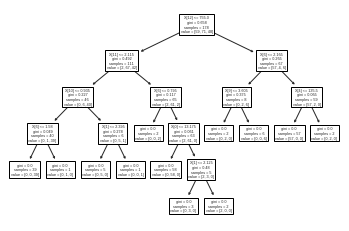

In [26]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

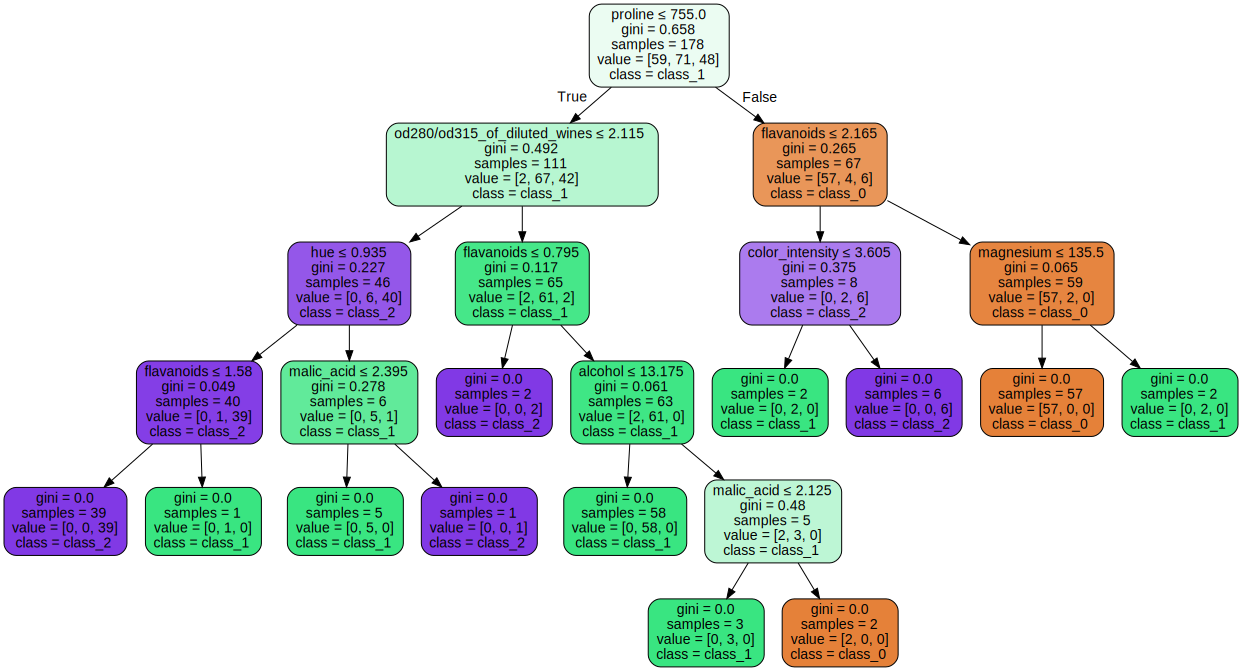

In [27]:
dot_data=tree.export_graphviz(decision_tree=model,
                              feature_names=wine.feature_names,
                              class_names=wine.target_names,
                              filled=True, rounded=True
                              ,special_characters=True)
graph=graphviz.Source(dot_data)
graph

##### 결정 경계 시각화

(0.3600000000000001, 4.220000000000003, 9.6, 30.979999999999542)

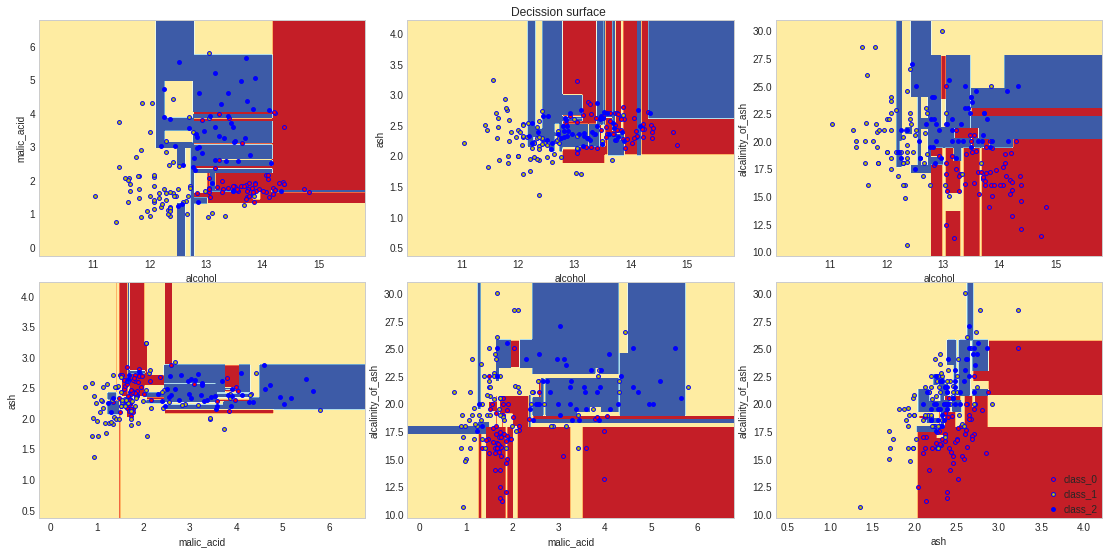

In [29]:
n_classes = 3
plot_colors = 'ryb'
plot_step=.02

plt.figure(figsize=(16,8))
for pairidx, pair in enumerate([[0,1],[0,2],[0,3],
                               [1,2],[1,3],[2,3]]):
  x=wine.data[:,pair]
  y=wine.target
  model = tree.DecisionTreeClassifier() #default=풀분류
  model = model.fit(x, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = x[:, 0].min()-1, x[:, 0].max()+1
  y_min, y_max = x[:, 1].min()-1, x[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=-.5, w_pad=.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(wine.feature_names[pair[0]])
  plt.ylabel(wine.feature_names[pair[1]])

  for i, color in zip(range(n_classes),plot_colors):
    idx=np.where(y==i)
    plt.scatter(x[idx,0],x[idx, 1], c=color, label = wine.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)

plt.suptitle("Decission surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

##### max_depth 변화에 따른 결정 경계의 변화 확인

(0.3600000000000001, 4.220000000000003, 9.6, 30.979999999999542)

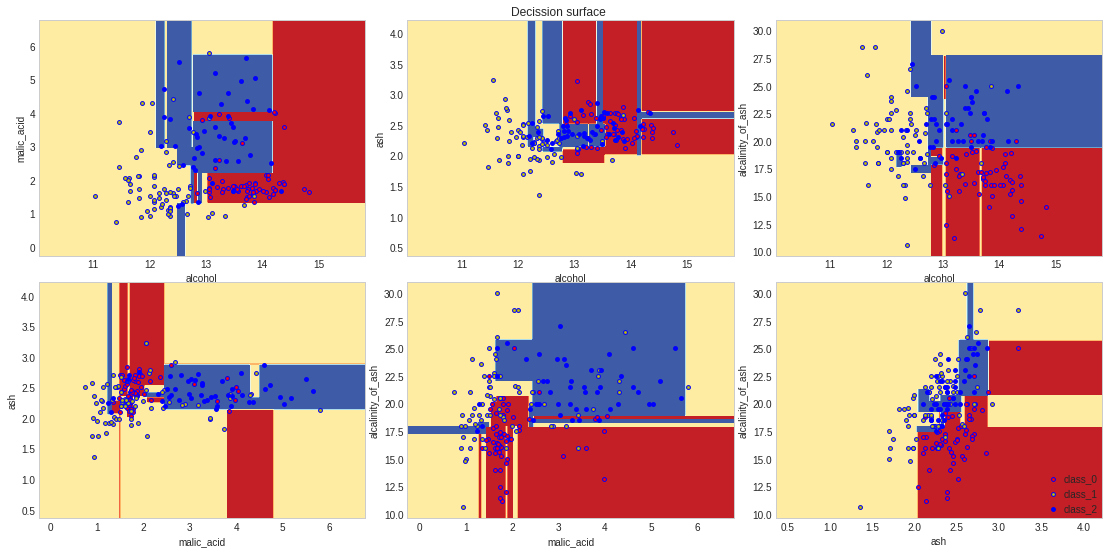

In [32]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                               [1, 2], [1, 3], [2, 3]]):
  x = wine.data[:, pair]
  y = wine.target

  model = tree.DecisionTreeClassifier(max_depth=6) #트리의 최대깊이를 지정하여 클래스를 나누는 정도를 지정. 오버피팅 방지.
  model = model.fit(x, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = x[:, 0].min()-1, x[:, 0].max()+1
  y_min, y_max = x[:, 1].min()-1, x[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), #등고선 작성
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=-.5, w_pad=.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(wine.feature_names[pair[0]])
  plt.ylabel(wine.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y==i)
    plt.scatter(x[idx, 0], x[idx, 1], c=color, label = wine.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decission surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

### 유방암 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

In [33]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target
# cancer_df
model=tree.DecisionTreeClassifier()
model.fit(cancer.data,cancer.target)
score=cross_val_score(estimator=model,
                      cv=5, X=cancer.data, y=cancer.target, 
                      n_jobs=multiprocessing.cpu_count())
score.mean()

0.9156031672100605

##### 전처리 후 학습

In [34]:
model= make_pipeline(StandardScaler(),
              tree.DecisionTreeClassifier()
              )
score=cross_val_score(estimator=model, cv=5, X=cancer.data,y=cancer.target)
score.mean()

0.9156031672100605

#### 학습된 결정 트리 시각화

In [35]:
model = tree.DecisionTreeClassifier()
model.fit(cancer.data, cancer.target)

DecisionTreeClassifier()

##### 텍스트를 통한 시각화

In [ ]:
r=tree.export_text(decision_tree=model, feature_names=cancer.feature_names)
print(r)

##### plot_tree를 사용한 시각화

In [ ]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

In [ ]:
dot_data = tree.export_graphviz(decision_tree=model,
                                feature_names = cancer.feature_names,
                                class_names = cancer.target_names,
                                filled = True, rounded = True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### 시각화

In [ ]:
n_classes = 3
plot_colors = 'ryb'
plot_step=.02

##### 결정 경계 시각화

In [ ]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                               [1, 2], [1, 3], [2, 3]]):
  x = cancer.data[:, pair]
  y = cancer.target

  model = tree.DecisionTreeClassifier()
  model = model.fit(x, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = x[:, 0].min()-1, x[:, 0].max()+1
  y_min, y_max = x[:, 1].min()-1, x[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=-.5, w_pad=.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(cancer.feature_names[pair[0]])
  plt.ylabel(cancer.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y==i)
    plt.scatter(x[idx, 0], x[idx, 1], c=color, label = cancer.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decission surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

##### 하이퍼파리미터를 변경해 보면서 결정 경계의 변화 확인

(0.0, 7.88, -0.9, 3.4800000000000044)

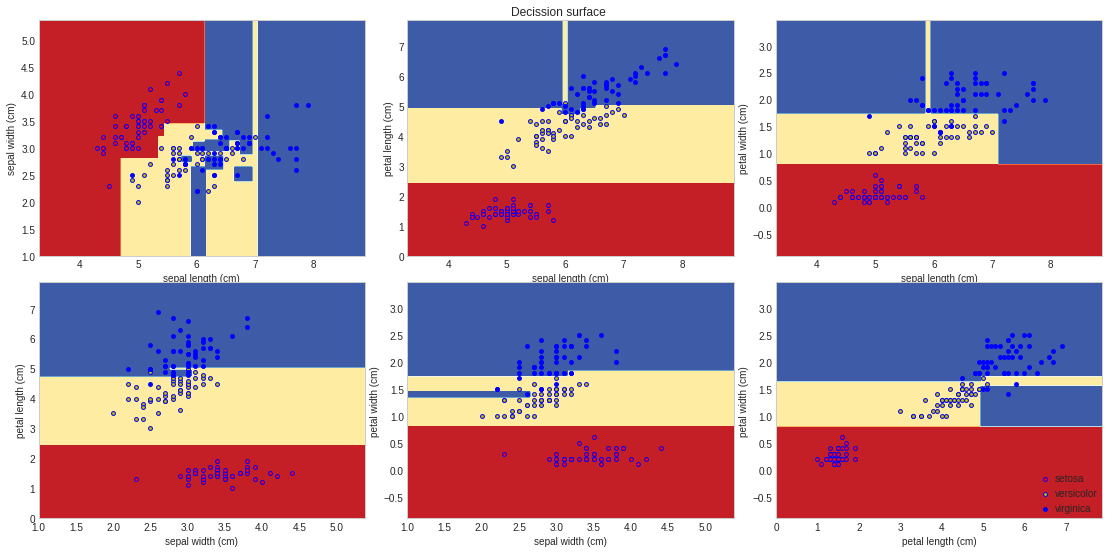

In [36]:
plt.figure(figsize=(16,8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                               [1, 2], [1, 3], [2, 3]]):
  x = iris.data[:, pair]
  y = iris.target

  model = tree.DecisionTreeClassifier(min_samples_split=5) # 사용가능한 주요 패러미터: max_depth, max_features, min_samples_split, min_sample_leaf, max_leaf_nodes
  model = model.fit(x, y)

  plt.subplot(2, 3, pairidx + 1)

  x_min, x_max = x[:, 0].min()-1, x[:, 0].max()+1
  y_min, y_max = x[:, 1].min()-1, x[:, 1].max()+1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  plt.tight_layout(h_pad=-.5, w_pad=.5, pad=2.5)

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  plt.xlabel(iris.feature_names[pair[0]])
  plt.ylabel(iris.feature_names[pair[1]])

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y==i)
    plt.scatter(x[idx, 0], x[idx, 1], c=color, label = iris.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='b', s=15)
    
plt.suptitle("Decission surface")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

## 회귀 - `DecisionTreeRegressor()`

### 보스턴 주택 가격 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

In [ ]:
model = tree.DecisionTreeRegressor() #model 이 regressor 인 것만 다르다.

In [ ]:
cross_val_score(estimator=model,
                X=boston.data, y = boston.target,
                cv=5,
                n_jobs = multiprocessing.cpu_count()
                )

array([ 0.63501003,  0.40997391,  0.62969202,  0.38273241, -1.78090206])

##### 전처리 후 학습

In [ ]:
model = make_pipeline(
    StandardScaler(),
    tree.DecisionTreeRegressor()
)

In [ ]:
cross_val_score(estimator=model,
                X=boston.data, y = boston.target,
                cv=5,
                n_jobs = multiprocessing.cpu_count()
                )

array([ 0.61251521,  0.61575415,  0.64705799,  0.35715586, -1.4624528 ])

#### 학습된 결정 트리 시각화

In [ ]:
model = tree.DecisionTreeRegressor()
model.fit(boston.data, boston.target)

DecisionTreeRegressor()

##### 텍스트를 통한 시각화

In [ ]:
print(tree.export_text(model))

|--- feature_5 <= 6.94
|   |--- feature_12 <= 14.40
|   |   |--- feature_7 <= 1.38
|   |   |   |--- feature_11 <= 339.99
|   |   |   |   |--- value: [27.90]
|   |   |   |--- feature_11 >  339.99
|   |   |   |   |--- value: [50.00]
|   |   |--- feature_7 >  1.38
|   |   |   |--- feature_5 <= 6.54
|   |   |   |   |--- feature_12 <= 7.57
|   |   |   |   |   |--- feature_9 <= 222.50
|   |   |   |   |   |   |--- value: [28.70]
|   |   |   |   |   |--- feature_9 >  222.50
|   |   |   |   |   |   |--- feature_2 <= 5.48
|   |   |   |   |   |   |   |--- feature_10 <= 19.95
|   |   |   |   |   |   |   |   |--- feature_11 <= 393.33
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 3.90
|   |   |   |   |   |   |   |   |   |   |--- feature_8 <= 2.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [21.90]
|   |   |   |   |   |   |   |   |   |   |--- feature_8 >  2.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- feat

##### plot_tree를 사용한 시각화

[Text(0.6803318352457202, 0.975, 'X[5] <= 6.941\nsquared_error = 84.42\nsamples = 506\nvalue = 22.533'),
 Text(0.42347358784681227, 0.925, 'X[12] <= 14.4\nsquared_error = 40.273\nsamples = 430\nvalue = 19.934'),
 Text(0.18679369281286895, 0.875, 'X[7] <= 1.385\nsquared_error = 26.009\nsamples = 255\nvalue = 23.35'),
 Text(0.10566982733175916, 0.825, 'X[11] <= 339.985\nsquared_error = 78.146\nsamples = 5\nvalue = 45.58'),
 Text(0.1037808072609209, 0.775, 'squared_error = 0.0\nsamples = 1\nvalue = 27.9'),
 Text(0.1075588474025974, 0.775, 'squared_error = 0.0\nsamples = 4\nvalue = 50.0'),
 Text(0.26791755829397873, 0.825, 'X[5] <= 6.543\nsquared_error = 14.885\nsamples = 250\nvalue = 22.905'),
 Text(0.11133688754427391, 0.775, 'X[12] <= 7.57\nsquared_error = 8.39\nsamples = 195\nvalue = 21.63'),
 Text(0.04129279811097993, 0.725, 'X[9] <= 222.5\nsquared_error = 3.015\nsamples = 43\nvalue = 23.97'),
 Text(0.039403778040141675, 0.675, 'squared_error = 0.0\nsamples = 1\nvalue = 28.7'),
 Text(

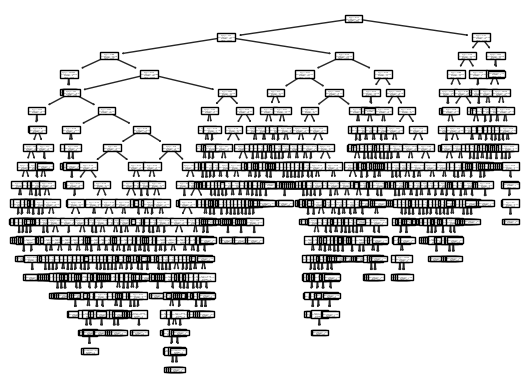

In [ ]:
tree.plot_tree(model)

##### graphviz를 사용한 시각화

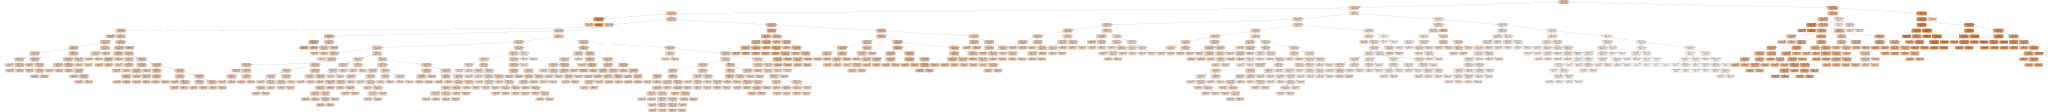

In [ ]:
dot_data = tree.export_graphviz(decision_tree=model,
                                feature_names = boston.feature_names,
                                filled = True, rounded = True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

#### 시각화

##### 회귀식 시각화

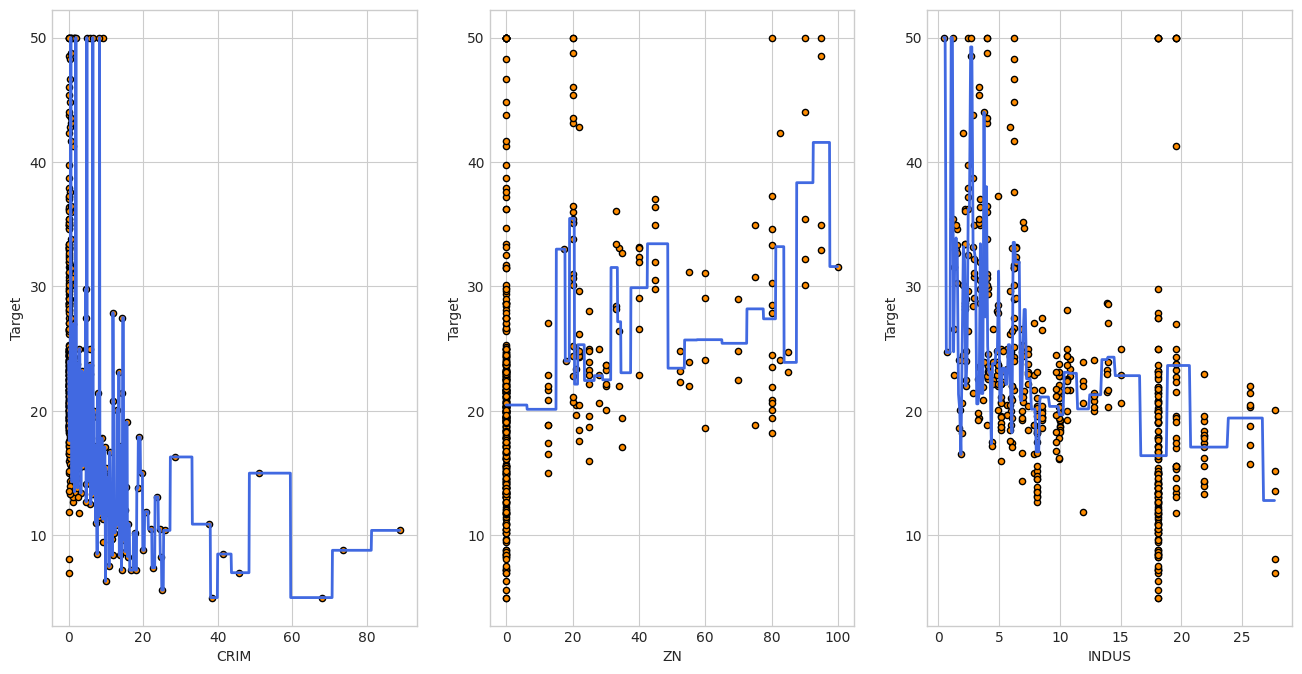

In [ ]:
plt.figure(figsize=(16, 8))

for pairidx, pair in enumerate([0, 1, 2]):
  x = boston.data[:, pair].reshape(-1, 1)
  y = boston.target

  model = tree.DecisionTreeRegressor()
  model = model.fit(x, y)

  x_test = np.arange(min(x), max(x), 0.1)[:, np.newaxis]
  predict = model.predict(x_test)

  plt.subplot(1, 3, pairidx + 1)
  plt.scatter(x, y, s=20, edgecolors='k',
              c='darkorange', label='data')
  plt.plot(x_test, predict, color='royalblue', linewidth=2)
  plt.xlabel(boston.feature_names[pair])
  plt.ylabel('Target')

##### 하이퍼파리미터를 변경해 보면서 회귀식 시각화

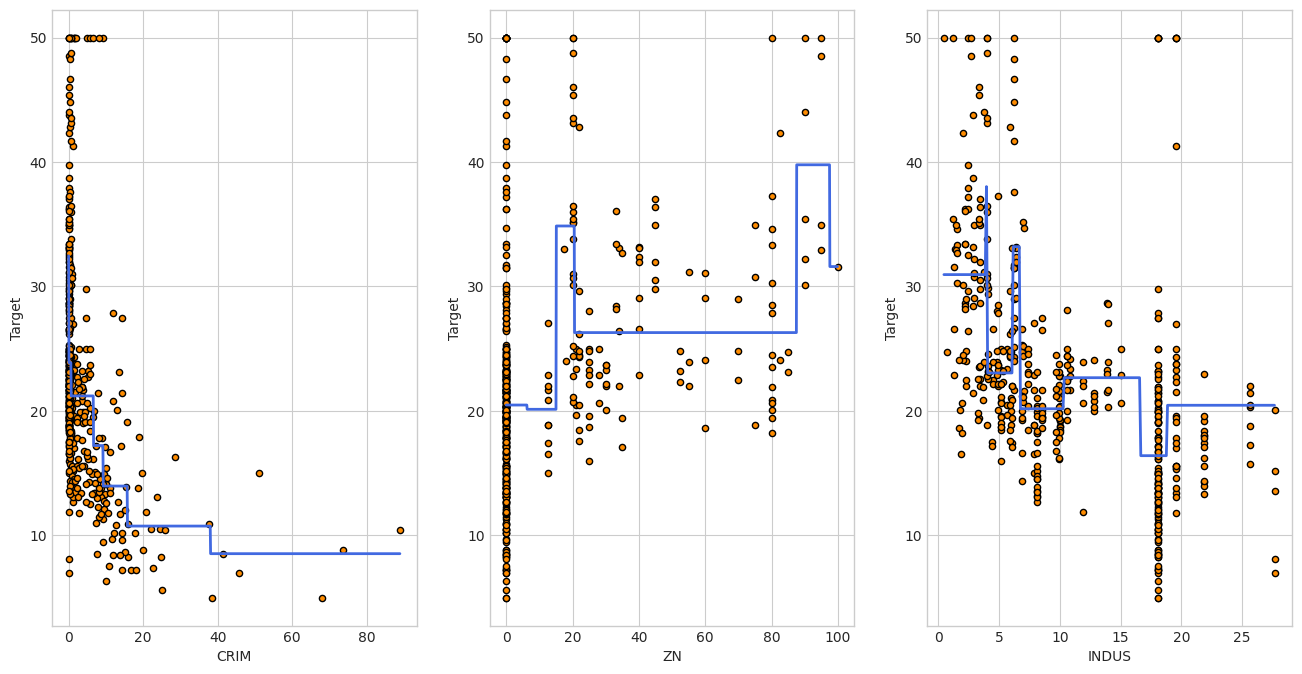

In [ ]:
plt.figure(figsize=(16, 8))

for pairidx, pair in enumerate([0, 1, 2]):
  x = boston.data[:, pair].reshape(-1, 1)
  y = boston.target

  model = tree.DecisionTreeRegressor(max_depth=3)
  model = model.fit(x, y)

  x_test = np.arange(min(x), max(x), 0.1)[:, np.newaxis]
  predict = model.predict(x_test)

  plt.subplot(1, 3, pairidx + 1)
  plt.scatter(x, y, s=20, edgecolors='k',
              c='darkorange', label='data')
  plt.plot(x_test, predict, color='royalblue', linewidth=2)
  plt.xlabel(boston.feature_names[pair])
  plt.ylabel('Target')

### 당뇨병 데이터 학습

#### 교차 검증

##### 전처리 없이 학습

##### 전처리 후 학습

#### 학습된 결정 트리 시각화

##### 텍스트를 통한 시각화

##### graphviz를 사용한 시각화

#### 시각화

##### 회귀식 시각화

##### max_depth 변화에 따른 시각화